# 1-D CCN application to a set of different CCSN waveform

Core-collapse supernovae (CCSNe) are extreme astrophysical events that can potentially generate gravitational waves, which are ripples in the fabric of spacetime. Theoretical models have provided insights into the potential waveforms that could be associated with these events. Here are some aspects to consider:

* Prompt Gravitational Waves: Prompt gravitational waves refer to the initial burst of gravitational radiation emitted during the core collapse and bounce phase of a supernova. This phase occurs when the stellar core undergoes a rapid collapse and subsequently rebounds due to the stiffening of nuclear matter. Theoretical calculations suggest that this rapid change in the core's dynamics could generate a short-duration burst of gravitational waves, lasting only a few milliseconds.

* Convective Instability and Asymmetry: During the post-bounce phase of a CCSN, the turbulent convective motions in the outer layers of the collapsing star can induce asymmetries in the explosion. These asymmetries, such as the growth of large-scale vortices and turbulent eddies, can potentially generate gravitational waves. The resulting gravitational waveforms would exhibit characteristic oscillations and modulations corresponding to the convective motions and asymmetries within the supernova.

* Neutrino-Driven Convection: Neutrinos, which are subatomic particles produced abundantly in CCSNe, play a crucial role in the dynamics of these events. Neutrino-driven convection occurs when the intense neutrino flux emitted during the core-collapse phase interacts with matter, driving convective motions in the outer layers of the supernova. These convective motions can generate gravitational waves due to the associated mass motions and asymmetries.

* Supernova Remnant: After the initial explosion, a supernova remnant is formed, consisting of the ejected material expanding into the surrounding medium. As the remnant evolves, interactions between the expanding shock wave and the circumstellar or interstellar medium can generate gravitational waves. These waves would arise from the dynamical processes and instabilities occurring within the remnant, providing information about its structure and evolution.

It is important to note that the study of gravitational wave emission from CCSNe is still an active area of research. As gravitational wave detectors become more sensitive and advancements in theoretical modeling continue, we may gain a deeper understanding of the potential waveforms associated with these extraordinary astrophysical events.

## Different CCSN signals to classify

In this tutorial, we will tackle the task of classifying different signals. In particular, we will have access to three distinct types of gravitational wave (GW) waveforms generated by core-collapse supernovae (CCSN), as well as chirp waveforms with different signal-to-noise ratio (SNR) distributions.

GW waveforms from CCSN represent the signals generated during the energetic explosions that occur at the end of a massive star's life. These gravitational waveforms can be detected by gravitational wave observatories such as LIGO and Virgo. In our case, we will have three types of CCSN waveforms, each with unique distinguishing features.

Additionally, we will also have chirp waveforms, which are signals characterized by a gradual frequency transition over time. These chirp waveforms will have different SNR distributions, representing the ratio between the signal power and the background noise power present in the data.

The goal of this tutorial will be to develop a classification model that can distinguish between the different types of signals at our disposal. We will utilize machine learning techniques, such as neural network training, to create a classifier that can learn the distinctive patterns of each signal type and make accurate predictions about their classification.

During the training process, we will use an annotated dataset that contains examples of the various CCSN GW waveforms and chirp waveforms with their respective SNR distributions. This will allow us to teach our model to recognize the salient features of each signal type and correctly associate them with their respective classes.

Once the model is trained, we will evaluate it using a separate test dataset to assess its performance in classifying unknown signals. We will monitor metrics such as prediction accuracy and confusion matrices to evaluate the effectiveness of our model in correctly distinguishing between the different signal types.

In conclusion, through this tutorial, we will have the opportunity to explore signal classification using CCSN GW waveforms and chirp waveforms with different SNR distributions. By employing machine learning techniques, we will strive to develop a classification model that can accurately differentiate between the various signal types, paving the way for further discoveries and applications in the field of astronomy and gravitational wave physics.

## ET noise sensitivity

The sensitivity of the Einstein Telescope is expected to be several orders of magnitude higher than existing detectors like LIGO and Virgo. This enhanced sensitivity opens up new possibilities for detecting a wider range of gravitational wave sources and extracting more detailed information from the observed signals. We simulated the detector noise as in the case of the Einstein Telescope.

# The data

In this tutorial, we will be working with simulated data that replicates the sensitivity of the Einstein Telescope (ET). These data have been carefully generated to include four different types of waveforms, each with varying Signal-to-Noise Ratio (SNR) values.

To ensure the data is ready for analysis, we have pre-processed it by applying a whitening technique. This process helps to normalize the data and remove any frequency-dependent noise, allowing you to work directly with the waveforms.

The simulated data has a sampling rate of 4096 Hz, meaning that measurements were taken 4096 times per second. This high sampling rate enables precise capturing of the waveforms' characteristics and ensures accurate analysis.

Furthermore, the data is divided into windows of 2 seconds each. This window size provides a suitable duration for analyzing the waveforms and extracting meaningful features.

### Let's download our data set which we will use for our goal

In [1]:
import os
try:
    import wget
    import requests
except:
    ! pip install -q "wget"
    ! pip install -q "request"
import tqdm

def download(url: str, filename: str):
    with open(filename, 'wb') as f:
        with requests.get(url, stream=True) as r:
            r.raise_for_status()
            total = int(r.headers.get('content-length', 0))

            # tqdm has many interesting parameters. Feel free to experiment!
            tqdm_params = {
                'desc': url,
                'total': total,
                'miniters': 1,
                'unit': 'B',
                'unit_scale': True,
                'unit_divisor': 1024,
            }
            with tqdm.tqdm(**tqdm_params) as pb:
                for chunk in r.iter_content(chunk_size=8192):
                    pb.update(len(chunk))
                    f.write(chunk) 

In [2]:
url_orig = "https://owncloud.ego-gw.it/index.php/s/Ff4i0ccG1HIg0mc/download"
target_path = '../../data/'

if not os.path.exists(target_path):
    os.mkdir(target_path)

target_file= '../../data/datasets.tgz'
download(url_orig, target_file)

https://owncloud.ego-gw.it/index.php/s/Ff4i0ccG1HIg0mc/download: 100%|█████████████████████████████| 412M/412M [00:04<00:00, 94.5MB/s]


In [3]:
import tarfile
tardata = tarfile.open(target_file)
tardata.extractall(target_path) # specify which folder to extract to
tardata.close()

You have access to 4 different types of signals: 3 from core-collapse supernovae (CCSN) and 1 from chirp waveforms. Specifically, for CCSN, we have: Non Exploding, Neutrino Explosion Mechanism, and Magnetorotational Explosion Mechanism.

- Non Exploding: This type of CCSN signal represents cases where the core-collapse supernova event does not result in a successful explosion. The collapse of the stellar core occurs without a significant release of energy, leading to a lack of observable explosion-related gravitational waveforms.

- Neutrino Explosion Mechanism: The Neutrino Explosion Mechanism signals correspond to core-collapse supernovae that undergo a successful explosion primarily driven by neutrino interactions. In this scenario, the intense neutrino flux plays a crucial role in reviving the shock wave, leading to the release of gravitational wave energy.

- Magnetorotational Explosion Mechanism: The Magnetorotational Explosion Mechanism signals are associated with core-collapse supernovae in which the magnetic fields and rotation of the collapsing star contribute to the explosion mechanism. These signals exhibit distinct characteristics resulting from the interplay between magnetic fields, rotation, and the dynamics of the explosion.

- In addition to the CCSN signals, there is also a chirplet waveform available for analysis. These signals exhibit a characteristic "chirping" behavior, where the frequency and amplitude change over time.

By studying and classifying these diverse signal types, we aim to deepen our understanding of the physical processes behind core-collapse supernovae and binary mergers, enhance our ability to detect and interpret gravitational wave data, and gain insights into the astrophysical phenomena driving these events.

 
1. NON EXPLODING (modello z100) J. Powell, B. Müller, and A. Heger, Mon. Not. Roy. Astron. Soc. 503, 2108 (2021), 2101.06889.
2. NEUTRINO(s18):Monthly Notices of the Royal Astronomical Society, Volume 487, Issue 1, July 2019, Pages (edited) 
3. MAGNETOROTATIONAL (m39): Monthly Notices of the Royal Astronomical Society, Volume 522, Issue 4, July 2023, Pages 6070–6086, https://doi.org/10.1093/mnras/stad1292

In [4]:
try:
    import sklearn as sk
except:
    ! pip install -q "scikit-learn"

In [5]:
try:
    import tensorflow as tf
except:
    ! pip install -q "tensorflow"

2023-09-08 16:57:13.823033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 16:57:14.493987: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 1-D CNN

 
One-Dimensional Convolutional Neural Network (1-D CNN) classification tasks are widely used in various fields, including natural language processing, signal processing, and time series analysis. Unlike traditional CNNs that operate on two-dimensional images, 1-D CNNs are specifically designed to handle sequential data, such as text or temporal data.

In a 1-D CNN classification task, the input data is typically represented as a sequence of features or values. For example, in natural language processing, a sentence can be represented as a sequence of word embeddings or one-hot encoded vectors. In signal processing, a time series can be represented as a sequence of amplitude values.

The key idea behind 1-D CNNs is to apply filters or convolutional operations to the input sequence, which helps capture local patterns and relationships between neighboring elements. These filters slide over the input sequence, computing a dot product between the filter weights and a local window of the input at each position. The resulting feature maps contain information about local patterns present in the input sequence.

To capture higher-level patterns and relationships, multiple convolutional layers can be stacked in a 1-D CNN architecture. Each layer can have different filter sizes and numbers, allowing the network to learn different levels of abstraction. Additionally, non-linear activation functions, such as ReLU (Rectified Linear Unit), are commonly applied after each convolutional operation to introduce non-linearity into the network.

After several convolutional layers, the output feature maps are typically flattened into a one-dimensional vector and passed through one or more fully connected layers. These fully connected layers learn to combine the extracted features and make predictions based on the learned representations. The final layer usually consists of softmax activation, which outputs class probabilities for multiclass classification tasks or a sigmoid activation for binary classification tasks.

During training, the 1-D CNN learns to minimize a loss function, such as categorical cross-entropy or binary cross-entropy, by adjusting the weights of the filters and fully connected layers through backpropagation. The model is optimized using gradient descent or one of its variants.

To prevent overfitting, common regularization techniques such as dropout or L1/L2 regularization can be applied. Additionally, techniques like batch normalization can help stabilize and speed up the training process.

1-D CNNs have shown great success in various tasks, such as sentiment analysis, document classification, speech recognition, and anomaly detection in time series data. They can effectively capture local patterns and dependencies while being computationally efficient, making them a powerful tool for analyzing and classifying sequential data.

### Let's have a look at the signal in time-domain 
This data have been already whitened, so most of colored noise have been removed. We can have a look in the time-domain.

In [6]:
import matplotlib.pyplot as plt
import IPython
import IPython.display
import matplotlib as mpl
import numpy as np 
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
 

In [7]:
chirp= np.load(target_path+'chirp/'+'chirp_snr30_1.npy')
magrot=np.load(target_path+'magrot/'+'magrot_snr30_1.npy')
neutrino=np.load(target_path+'neutrino/'+'neutrino_snr30_1.npy')
noexp=np.load(target_path+'noexp/'+'noexp_snr30_1.npy')


Text(0.5, 1.0, 'No explosion mechanism')

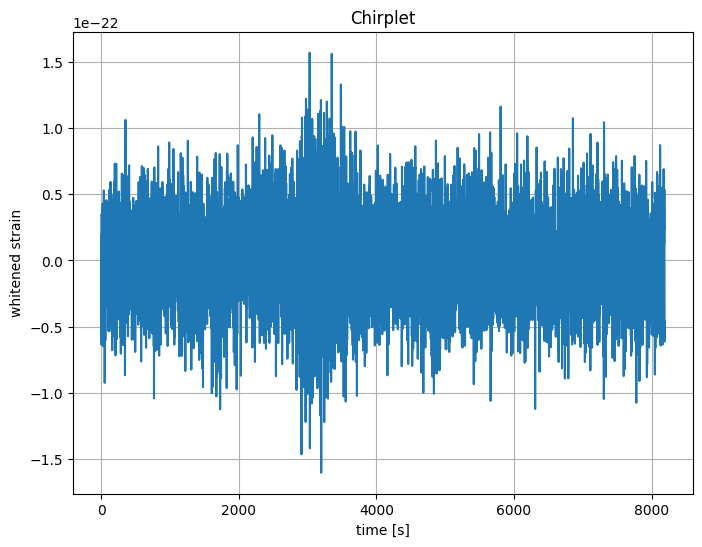

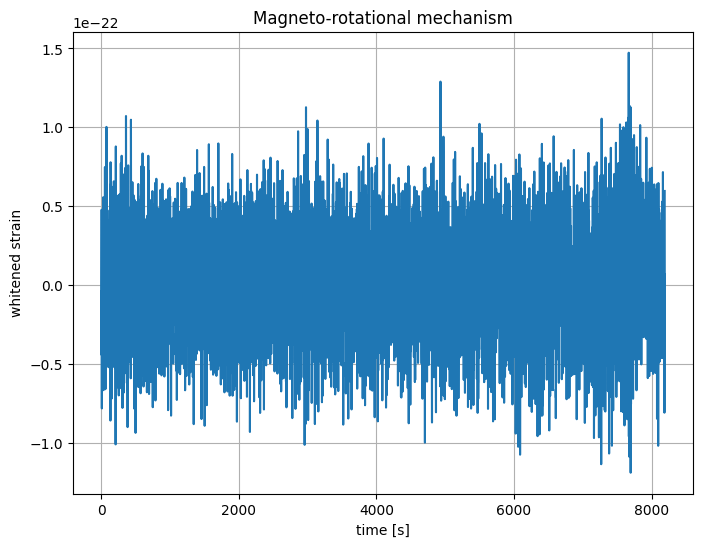

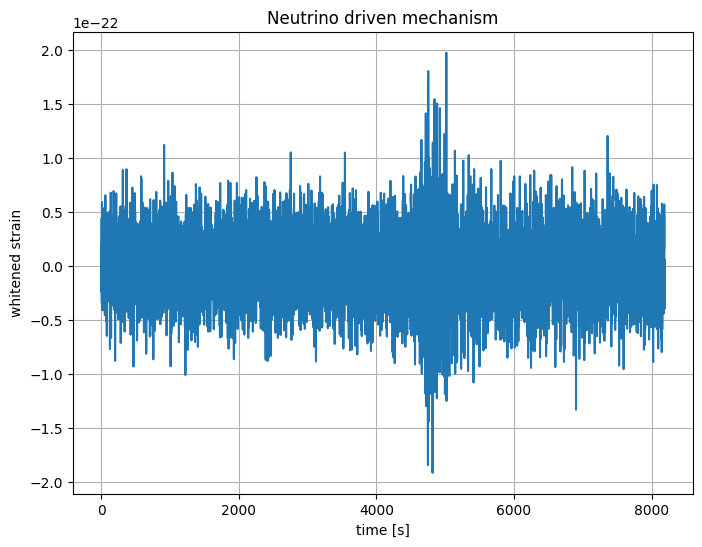

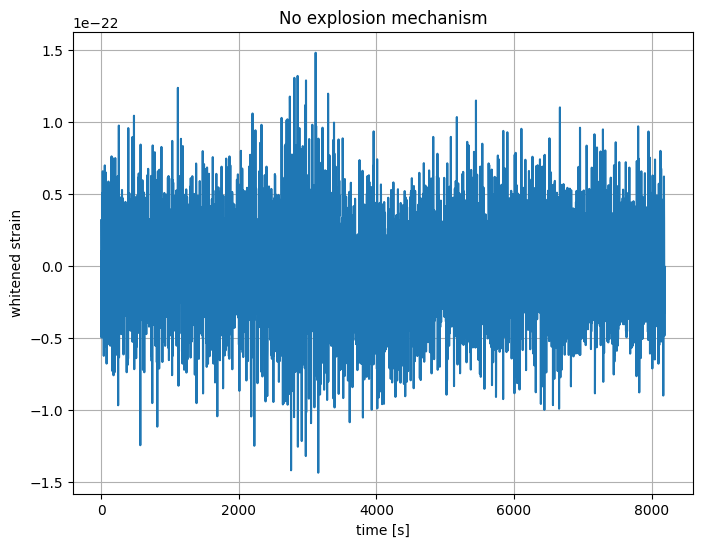

In [8]:
#%matplotlib widget
plt.figure()
plt.grid(), plt.xlabel('time [s]'), plt.ylabel('whitened strain')
plt.plot(chirp,label='Chirplet')
plt.title('Chirplet')
plt.figure()
plt.grid(), plt.xlabel('time [s]'), plt.ylabel('whitened strain')
plt.plot(magrot,label='Magneto-rotational mechanism')
plt.title('Magneto-rotational mechanism')
plt.figure()
plt.grid(), plt.xlabel('time [s]'), plt.ylabel('whitened strain')
plt.plot(neutrino,label='Neutrino driven mechanism')
plt.title('Neutrino driven mechanism')
plt.figure()
plt.grid(), plt.xlabel('time [s]'), plt.ylabel('whitened strain')
plt.plot(noexp,label='No explosion mechanism')
plt.title('No explosion mechanism')

### Load data and create data frame for analysis using time series as input

In [9]:
os.listdir('../../data')

['datasets.tgz', 'chirp', 'neutrino', 'noexp', 'magrot']

In [10]:
import pandas as pd
embed_path = target_path+'chirp/'      

arr = []
for file in os.listdir(embed_path):
    temp = np.load(embed_path + file)
    arr.append(temp)

df_chirp = pd.DataFrame(arr)
df_chirp.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,9.075093e-24,-2.362770e-23,-4.427853e-23,-4.864798e-23,-3.113384e-24,2.205458e-23,-1.932219e-23,-1.517503e-23,-2.357445e-23,-2.481552e-23,...,3.032932e-23,4.324992e-23,2.594092e-23,-2.167693e-25,-4.307706e-23,-4.022224e-23,-5.999141e-23,-7.040298e-23,-6.907593e-23,-3.380597e-23
1,-3.371545e-23,-3.230696e-23,3.694699e-23,1.718377e-23,-2.271463e-24,-5.235290e-23,-6.204656e-23,-3.228038e-23,1.093562e-24,7.830972e-23,...,-3.528356e-24,1.255482e-23,-3.032731e-23,-9.601776e-24,-2.322140e-23,2.121926e-23,2.144322e-23,3.971563e-23,8.053534e-24,1.929978e-23
2,4.144589e-23,4.828882e-23,-2.383457e-23,4.864672e-23,3.538171e-23,-5.114464e-24,3.277147e-24,2.056628e-23,2.223603e-23,-2.560149e-23,...,-5.062593e-24,5.450244e-23,4.519283e-23,1.830216e-23,9.812266e-24,-2.432995e-23,-1.386818e-23,-2.305219e-23,-6.661752e-23,-3.861854e-23
3,-5.052600e-23,-4.872576e-23,-3.088162e-23,9.231221e-24,1.632213e-23,2.161566e-23,-1.243054e-23,-4.281310e-23,1.652402e-23,3.234000e-23,...,-4.743664e-23,2.609358e-23,3.931483e-23,-4.068857e-23,-1.134250e-22,-9.597202e-23,4.950209e-24,-3.553663e-25,3.514175e-23,3.988272e-23
4,2.167292e-23,-1.583323e-23,3.735145e-24,1.606595e-23,1.968470e-23,2.868146e-23,3.938452e-23,5.337086e-23,7.654779e-26,-9.090871e-25,...,-3.676057e-23,-3.947635e-23,-2.502099e-23,-1.232145e-24,1.378805e-23,2.219625e-23,-5.670937e-24,-2.306513e-24,4.932566e-24,-1.053924e-23


<Axes: >

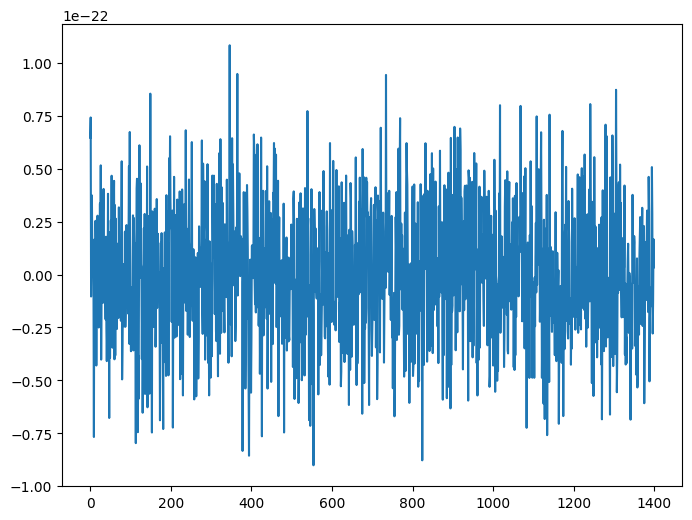

In [11]:
df_chirp[10].plot()

#### add label column

In [12]:
# Using 'Address' as the column name
# and equating it to the list
df_chirp['label'] = 0 #chirplet


In [13]:
df_chirp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,9.075093e-24,-2.362770e-23,-4.427853e-23,-4.864798e-23,-3.113384e-24,2.205458e-23,-1.932219e-23,-1.517503e-23,-2.357445e-23,-2.481552e-23,...,4.324992e-23,2.594092e-23,-2.167693e-25,-4.307706e-23,-4.022224e-23,-5.999141e-23,-7.040298e-23,-6.907593e-23,-3.380597e-23,0
1,-3.371545e-23,-3.230696e-23,3.694699e-23,1.718377e-23,-2.271463e-24,-5.235290e-23,-6.204656e-23,-3.228038e-23,1.093562e-24,7.830972e-23,...,1.255482e-23,-3.032731e-23,-9.601776e-24,-2.322140e-23,2.121926e-23,2.144322e-23,3.971563e-23,8.053534e-24,1.929978e-23,0
2,4.144589e-23,4.828882e-23,-2.383457e-23,4.864672e-23,3.538171e-23,-5.114464e-24,3.277147e-24,2.056628e-23,2.223603e-23,-2.560149e-23,...,5.450244e-23,4.519283e-23,1.830216e-23,9.812266e-24,-2.432995e-23,-1.386818e-23,-2.305219e-23,-6.661752e-23,-3.861854e-23,0
3,-5.052600e-23,-4.872576e-23,-3.088162e-23,9.231221e-24,1.632213e-23,2.161566e-23,-1.243054e-23,-4.281310e-23,1.652402e-23,3.234000e-23,...,2.609358e-23,3.931483e-23,-4.068857e-23,-1.134250e-22,-9.597202e-23,4.950209e-24,-3.553663e-25,3.514175e-23,3.988272e-23,0
4,2.167292e-23,-1.583323e-23,3.735145e-24,1.606595e-23,1.968470e-23,2.868146e-23,3.938452e-23,5.337086e-23,7.654779e-26,-9.090871e-25,...,-3.947635e-23,-2.502099e-23,-1.232145e-24,1.378805e-23,2.219625e-23,-5.670937e-24,-2.306513e-24,4.932566e-24,-1.053924e-23,0
5,-3.437408e-23,-1.215517e-23,-3.121741e-23,1.102303e-23,6.668852e-24,-3.481673e-23,-4.650635e-23,-4.027984e-23,2.003776e-23,1.312863e-23,...,7.589389e-25,-7.571339e-25,5.023788e-23,6.815329e-24,-2.203030e-23,-5.920037e-23,-1.436794e-24,1.362855e-23,1.108083e-23,0
6,-5.296247e-23,-4.278406e-23,3.960662e-24,7.190764e-23,2.426775e-23,1.524945e-23,8.572472e-24,-4.529421e-23,-3.789004e-23,-4.996974e-24,...,-5.377822e-23,-2.738392e-23,1.424327e-23,3.805290e-23,3.268804e-23,5.361300e-23,2.324956e-23,-1.834042e-23,-1.590962e-23,0
7,-2.756933e-23,-9.112824e-24,-6.462429e-24,-1.529056e-23,2.056495e-23,-2.777253e-23,-2.418845e-23,-4.461664e-23,-5.295602e-23,2.968607e-23,...,2.367551e-23,-3.546709e-23,-4.813461e-23,2.441531e-23,1.209453e-23,2.268509e-23,2.106909e-23,2.298630e-23,2.796674e-23,0
8,-4.299339e-24,-3.675161e-23,-2.642734e-23,2.119717e-23,1.782270e-23,3.137505e-23,5.557648e-23,6.102501e-24,-2.580779e-23,2.533648e-25,...,-1.541185e-23,-1.966724e-23,2.249660e-23,-1.077933e-23,-3.597149e-23,-3.544061e-23,-3.916286e-23,6.837804e-24,1.992296e-24,0
9,1.379825e-23,1.567179e-23,5.566675e-24,6.051896e-23,2.943283e-23,-9.669308e-24,1.586325e-23,1.763606e-23,2.123951e-23,-3.896019e-23,...,-4.187238e-23,-4.485165e-23,-2.593985e-23,2.627256e-23,2.927600e-23,6.294391e-24,-4.356096e-23,1.368493e-23,-4.903663e-23,0


In [14]:
embed_path = target_path+'magrot/'      

arr = []
for file in os.listdir(embed_path):
    temp = np.load(embed_path + file)
    arr.append(temp)

df_magrot = pd.DataFrame(arr)
df_magrot['label'] = 1 #magneto-rotational
df_magrot.head()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,-2.861790e-23,-6.257226e-24,1.385490e-23,6.115134e-23,2.822689e-23,1.727872e-23,-1.986710e-24,-1.857631e-23,1.012974e-23,2.171233e-23,...,2.333302e-23,-5.583875e-24,2.015248e-23,6.556987e-24,-4.632458e-24,-4.504997e-24,-1.916415e-23,-1.393157e-23,-1.873206e-23,1
1,1.722119e-24,3.187710e-24,2.983111e-23,3.428618e-23,4.324557e-24,-9.122220e-24,-9.844348e-24,-2.480390e-23,-2.040018e-23,-2.860474e-23,...,5.934463e-23,-1.046085e-23,2.386446e-23,-1.509877e-23,2.577584e-23,1.235981e-23,-2.668356e-23,7.194547e-24,-3.287182e-23,1
2,-6.220026e-23,-8.955528e-24,2.014265e-23,3.977492e-23,1.871269e-23,9.341673e-24,-2.969022e-23,9.504120e-24,2.624119e-23,2.027395e-23,...,-4.571315e-23,-5.345384e-23,-2.645553e-23,-2.378083e-23,-3.195418e-23,-3.125112e-23,-7.806868e-24,4.172161e-23,2.643064e-23,1
3,2.512109e-23,9.275126e-24,-1.899381e-23,-3.359529e-23,-6.607420e-23,-4.465353e-23,1.072904e-23,-3.591899e-24,4.243013e-23,3.160918e-23,...,9.091463e-24,8.188751e-24,1.457704e-23,-6.411339e-23,-1.662969e-23,2.801942e-23,2.012547e-23,3.509809e-23,-2.572239e-23,1
4,-7.389377e-23,-4.541306e-23,-7.358253e-24,-1.357962e-23,-1.428686e-23,-1.177818e-23,-2.877708e-23,-1.065082e-23,-2.324427e-24,5.207842e-24,...,4.081137e-24,-2.135996e-23,-5.585861e-23,-5.914119e-23,2.377758e-24,-6.909160e-24,2.935268e-23,-4.006923e-23,-3.352085e-23,1


In [15]:
embed_path = target_path+'neutrino/'      

arr = []
for file in os.listdir(embed_path):
    temp = np.load(embed_path + file)
    arr.append(temp)

df_neutrino = pd.DataFrame(arr)
df_neutrino['label'] = 2 #neutrino-driven
df_neutrino.head()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,2.238571e-23,5.166627e-23,3.881311e-23,-9.019629e-24,-3.039094e-23,9.279470e-24,3.846888e-24,1.159443e-23,2.451079e-23,1.378707e-24,...,7.157688e-24,1.426792e-23,2.750651e-23,1.683469e-24,6.329538e-25,2.081362e-23,-1.806315e-23,3.077476e-24,-4.147635e-23,2
1,4.992320e-23,2.999402e-23,-1.814410e-23,6.706609e-24,3.189877e-23,4.313277e-23,1.317369e-23,-4.098346e-24,-2.282641e-23,-9.173464e-24,...,1.034018e-24,2.352763e-23,3.398759e-23,1.043131e-23,1.814702e-23,-1.477103e-23,-3.801659e-23,-8.229976e-24,6.869003e-23,2
2,2.606734e-23,2.402797e-23,1.933072e-23,5.755055e-24,-2.115212e-23,-2.588500e-23,3.249172e-23,2.466183e-23,-1.708305e-23,-8.709404e-24,...,-1.851666e-23,-3.414663e-23,-5.489062e-23,-8.425323e-23,-6.897509e-23,-3.543296e-23,-1.463545e-23,-3.780045e-23,3.791348e-24,2
3,-4.553934e-24,-6.458978e-24,3.512299e-24,-1.197306e-23,1.333738e-23,5.516552e-23,1.763972e-23,-2.838339e-23,-4.501988e-23,-1.377131e-23,...,-2.390871e-23,1.406321e-23,-2.285266e-23,-1.955632e-23,-1.103460e-23,2.510928e-24,-2.464238e-23,3.287832e-23,2.941418e-23,2
4,1.671146e-24,1.779858e-23,-7.330710e-24,2.233298e-23,1.551588e-23,-5.478839e-23,-6.997506e-23,-3.835324e-23,-1.184925e-23,-1.578182e-23,...,2.221519e-23,1.769685e-24,3.869726e-23,4.157523e-24,-4.845001e-23,-1.206852e-23,7.356837e-24,1.424142e-23,2.684609e-23,2


In [16]:
embed_path = target_path+'noexp/'      

arr = []
for file in os.listdir(embed_path):
    temp = np.load(embed_path + file)
    arr.append(temp)

df_noexp = pd.DataFrame(arr)
df_noexp['label'] = 3 #no explosion mechanism
df_noexp.head()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,2.180351e-23,-1.434359e-23,6.162603e-24,7.977779e-24,1.889868e-23,7.810905e-23,5.315356e-23,9.743638e-24,4.695303e-24,-1.924162e-23,...,2.342785e-23,1.644624e-23,8.335326e-24,5.079508e-25,4.565885e-23,3.728980e-23,-9.387477e-24,-6.340995e-23,-8.973368e-23,3
1,-3.274227e-23,-4.989857e-24,-8.081336e-24,-3.684012e-23,2.315852e-23,-5.547973e-23,-6.890185e-23,-3.365202e-23,3.465735e-23,3.293092e-23,...,2.331765e-24,1.482523e-23,-4.247614e-23,-1.344177e-23,5.991044e-24,6.317549e-25,-1.686894e-23,8.573865e-24,3.543512e-23,3
2,8.705046e-24,-1.429064e-23,-2.226447e-23,-8.204643e-24,6.238868e-23,3.968119e-23,-9.169055e-24,1.030082e-23,-2.929076e-23,5.458179e-23,...,1.482897e-23,-1.579459e-23,-4.593981e-24,2.547965e-23,-2.041049e-24,-2.388993e-23,2.155081e-23,-2.466777e-23,-5.876313e-23,3
3,5.570632e-23,4.121051e-23,2.158202e-23,5.206179e-23,6.505013e-23,5.514945e-23,1.438710e-23,3.403183e-23,-3.115273e-23,-7.853830e-23,...,-3.817308e-23,-1.735998e-23,-7.665012e-24,5.707339e-23,-3.683446e-24,-5.456949e-23,1.944417e-24,-9.839470e-24,-3.220302e-23,3
4,1.218813e-23,5.351352e-24,7.009830e-23,4.443454e-23,4.770602e-24,-3.383372e-23,-4.474874e-23,-1.907953e-23,-3.881677e-23,-3.840885e-23,...,4.571492e-23,1.928173e-23,-1.663004e-23,3.282803e-23,5.067821e-23,3.062091e-24,-4.565546e-23,-3.213733e-23,-4.197097e-23,3


#### Let's concatenate the pandas dataframes

In [17]:

df_data = pd.concat([df_chirp, df_magrot,df_neutrino,df_noexp], axis=0)

In [18]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,9.075093e-24,-2.362770e-23,-4.427853e-23,-4.864798e-23,-3.113384e-24,2.205458e-23,-1.932219e-23,-1.517503e-23,-2.357445e-23,-2.481552e-23,...,4.324992e-23,2.594092e-23,-2.167693e-25,-4.307706e-23,-4.022224e-23,-5.999141e-23,-7.040298e-23,-6.907593e-23,-3.380597e-23,0
1,-3.371545e-23,-3.230696e-23,3.694699e-23,1.718377e-23,-2.271463e-24,-5.235290e-23,-6.204656e-23,-3.228038e-23,1.093562e-24,7.830972e-23,...,1.255482e-23,-3.032731e-23,-9.601776e-24,-2.322140e-23,2.121926e-23,2.144322e-23,3.971563e-23,8.053534e-24,1.929978e-23,0
2,4.144589e-23,4.828882e-23,-2.383457e-23,4.864672e-23,3.538171e-23,-5.114464e-24,3.277147e-24,2.056628e-23,2.223603e-23,-2.560149e-23,...,5.450244e-23,4.519283e-23,1.830216e-23,9.812266e-24,-2.432995e-23,-1.386818e-23,-2.305219e-23,-6.661752e-23,-3.861854e-23,0
3,-5.052600e-23,-4.872576e-23,-3.088162e-23,9.231221e-24,1.632213e-23,2.161566e-23,-1.243054e-23,-4.281310e-23,1.652402e-23,3.234000e-23,...,2.609358e-23,3.931483e-23,-4.068857e-23,-1.134250e-22,-9.597202e-23,4.950209e-24,-3.553663e-25,3.514175e-23,3.988272e-23,0
4,2.167292e-23,-1.583323e-23,3.735145e-24,1.606595e-23,1.968470e-23,2.868146e-23,3.938452e-23,5.337086e-23,7.654779e-26,-9.090871e-25,...,-3.947635e-23,-2.502099e-23,-1.232145e-24,1.378805e-23,2.219625e-23,-5.670937e-24,-2.306513e-24,4.932566e-24,-1.053924e-23,0


In [19]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
count,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,...,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6860.000000
mean,-1.154286e-25,1.992662e-25,4.072668e-26,4.316962e-25,-8.984004e-26,-3.885260e-25,-5.203248e-25,-3.198366e-25,-1.561784e-25,-3.699297e-25,...,2.352687e-25,7.528212e-25,4.769597e-25,2.506924e-25,3.724512e-25,2.993824e-25,1.089722e-26,2.323462e-26,-3.282150e-25,1.612245
std,3.171068e-23,3.157392e-23,3.112911e-23,3.143923e-23,3.169810e-23,3.095817e-23,3.144115e-23,3.139637e-23,3.125542e-23,3.128270e-23,...,3.173373e-23,3.118135e-23,3.155357e-23,3.179212e-23,3.184786e-23,3.192141e-23,3.146015e-23,3.151346e-23,3.182152e-23,1.103254
min,-1.114915e-22,-1.188222e-22,-1.126240e-22,-1.192515e-22,-1.521944e-22,-1.040827e-22,-1.085423e-22,-1.127676e-22,-1.152216e-22,-1.404565e-22,...,-1.134229e-22,-1.002762e-22,-1.253854e-22,-1.416084e-22,-1.099815e-22,-1.270186e-22,-1.135999e-22,-1.036019e-22,-1.080391e-22,0.000000
25%,-2.186117e-23,-2.092958e-23,-2.102632e-23,-2.062727e-23,-2.140262e-23,-2.133481e-23,-2.123406e-23,-2.119582e-23,-2.114997e-23,-2.086939e-23,...,-2.145985e-23,-2.043356e-23,-2.102175e-23,-2.083553e-23,-2.103406e-23,-2.122239e-23,-2.106016e-23,-2.099988e-23,-2.189011e-23,1.000000
50%,7.938817e-26,1.645258e-25,-1.028661e-25,9.207509e-25,-3.870340e-25,-4.969366e-25,-3.028121e-25,-2.969213e-25,-2.591411e-25,-8.086205e-26,...,3.922354e-25,2.438891e-25,5.197890e-25,6.225029e-25,-1.702040e-25,1.312327e-25,-1.150576e-25,1.099492e-25,-8.233232e-25,2.000000
75%,2.143826e-23,2.226364e-23,2.134714e-23,2.174260e-23,2.117601e-23,2.079873e-23,2.029182e-23,2.070313e-23,2.027512e-23,2.088304e-23,...,2.212541e-23,2.202369e-23,2.138133e-23,2.175184e-23,2.233422e-23,2.150369e-23,2.105579e-23,2.114953e-23,2.182929e-23,3.000000
max,1.319586e-22,1.421489e-22,1.059948e-22,1.175505e-22,1.250333e-22,1.332875e-22,1.119018e-22,1.308741e-22,1.207442e-22,1.084012e-22,...,1.240241e-22,1.238775e-22,1.186891e-22,1.132978e-22,1.290592e-22,1.241744e-22,1.160320e-22,1.077904e-22,1.100704e-22,3.000000


In [20]:
try:
    import sklearn  
except:
    ! pip install -q "scikit-learn"

#### Let's prepare test, training and validation data sets

In [21]:
from sklearn.model_selection import train_test_split
 
df_train, df_test = train_test_split(df_data, random_state=52,test_size=0.2)
 

In [22]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
1303,1.048615e-23,-1.103506e-23,-2.506626e-23,-3.555007e-23,-4.531067e-23,5.909867e-24,3.552331e-24,3.757509e-23,3.065625e-23,6.337256e-23,...,-1.155385e-23,1.695037e-23,7.388309e-23,7.413972e-23,3.930019e-23,3.661990e-23,-8.944619e-24,-2.099643e-24,3.436331e-24,3
1461,-2.556691e-23,-3.640042e-23,5.598857e-24,-3.207576e-24,1.183238e-23,3.562904e-23,3.043391e-23,4.553546e-23,1.949192e-23,2.997566e-23,...,2.250385e-23,2.601153e-23,2.296293e-24,-3.253828e-23,-7.719476e-23,-1.238792e-23,1.853076e-23,-1.385762e-23,-2.024649e-23,3
34,2.150072e-23,5.899940e-23,7.881115e-23,1.410432e-23,-5.787978e-23,-5.489445e-23,-1.953644e-23,-2.805640e-23,-3.192455e-23,1.563109e-23,...,1.938816e-23,-1.025411e-23,2.836885e-23,1.256112e-23,8.208705e-25,-2.673024e-23,7.441356e-24,2.131832e-23,3.118519e-23,0
73,1.908887e-23,-1.434246e-23,-5.414832e-23,-5.267964e-23,1.894220e-23,2.834227e-23,2.492599e-24,-4.221373e-23,-2.601673e-23,-2.201167e-23,...,-1.415062e-23,2.708145e-24,-3.620952e-23,-4.020544e-23,-2.721807e-23,-5.559900e-23,-3.868075e-24,-2.084482e-23,2.430971e-23,3
1026,-6.239863e-23,-5.653598e-23,-2.623193e-23,4.214579e-24,6.256116e-24,4.069852e-24,-2.439515e-23,-1.945337e-23,-7.868619e-24,-6.809929e-24,...,-1.365266e-23,-1.621239e-23,6.915477e-24,-1.414233e-23,-3.721200e-23,-1.806189e-24,-1.965491e-23,-1.326065e-23,-2.707213e-24,2


In [23]:
# Let's prepare the data for the Machine Learning pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train=df_train['label'].values
x_train=df_train.drop(['label'], axis=1).values
y_test=df_test['label'].values
x_test=df_test.drop(['label'], axis=1).values
# Normalization of the data sets
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test) 

## We will try to classify the signals using 1D-CNN model

In [24]:
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
#from tensorflow.keras.layers.advanced_activations import *
from tensorflow.keras.callbacks import Callback,EarlyStopping,ModelCheckpoint

 

In [25]:
tf.config.list_physical_devices('GPU')

2023-09-08 16:57:38.099152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-08 16:57:38.116178: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-08 16:57:38.116333: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

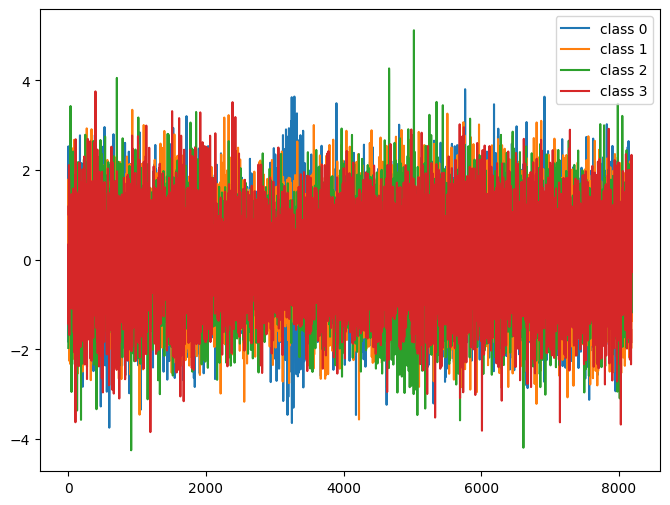

In [26]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [27]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [28]:
num_classes = len(np.unique(y_train))

In [29]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

### Build our Neural Network Model

2023-09-08 16:57:38.811624: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-08 16:57:38.811844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-08 16:57:38.811978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

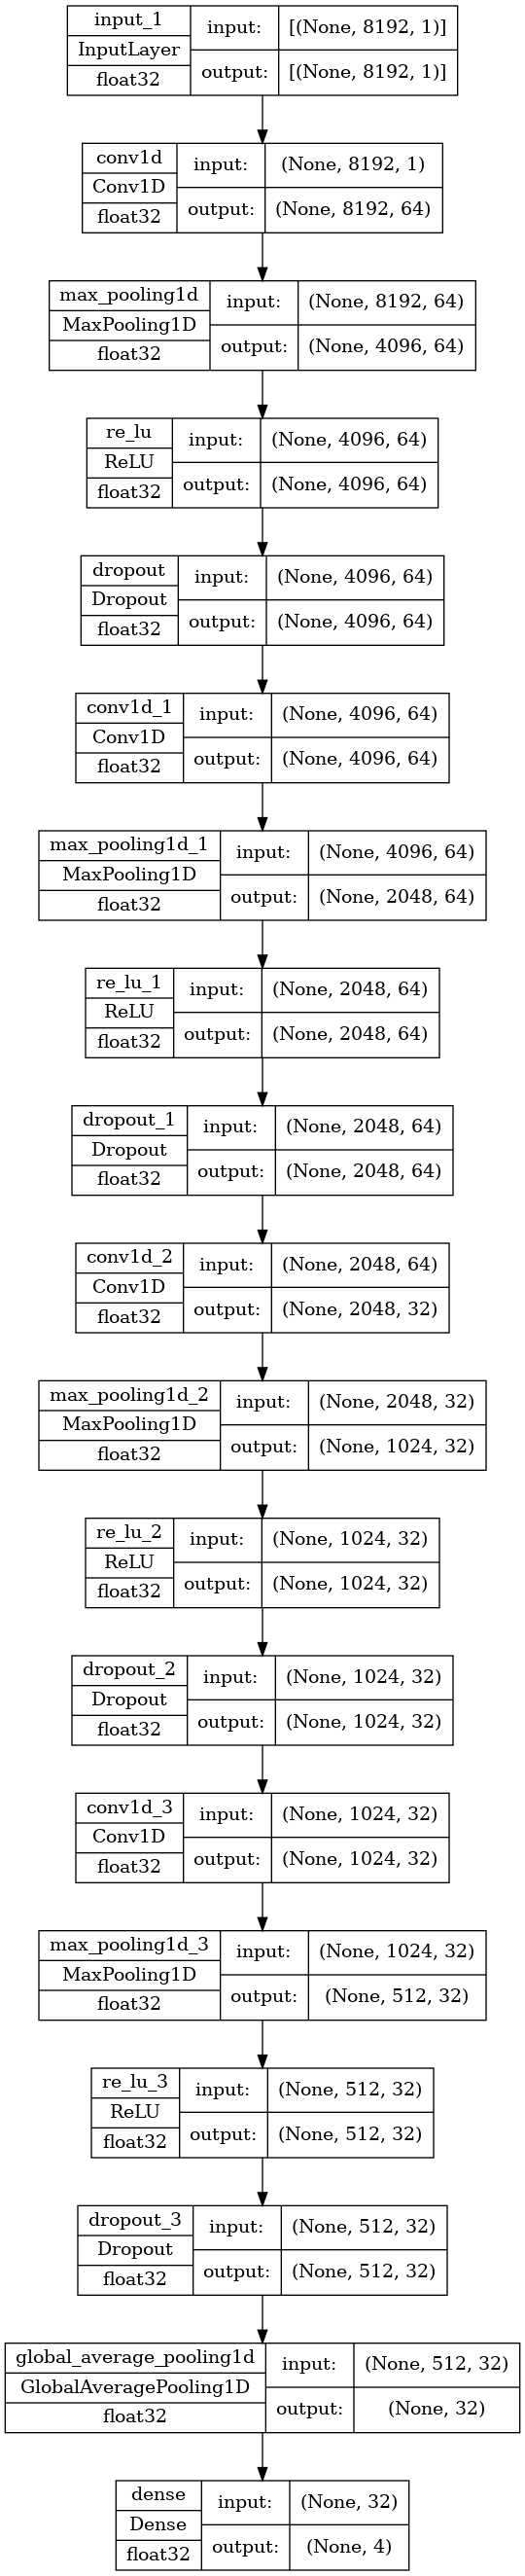

In [30]:
 
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.MaxPool1D((2))(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1=keras.layers.Dropout((0.1))(conv1)
    
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.MaxPool1D((2))(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2=keras.layers.Dropout((0.1))(conv2)
    
    conv3 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.MaxPool1D((2))(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3=keras.layers.Dropout((0.1))(conv3)
    
    conv4 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(conv3)
    conv4 = keras.layers.MaxPool1D((2))(conv4)
    conv4 = keras.layers.ReLU()(conv4)
    conv4=keras.layers.Dropout((0.1))(conv4)
     
    gap = keras.layers.GlobalAveragePooling1D()(conv4)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
 
keras.utils.plot_model(model,to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True)

In [31]:
### Start training the model

In [32]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=0),
]
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.95, beta_2=0.999,
                        epsilon=1e-8, amsgrad=True),
     loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500


2023-09-08 16:57:40.284003: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-08 16:57:40.356877: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-08 16:57:40.512543: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-08 16:57:40.523396: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f48e009f0c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-08 16:57:40.523437: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-09-08 16:57:40.531501: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-08 16:57:40.616895: I te

138/138 [==============================] - 4s 16ms/step - loss: 1.3780 - accuracy: 0.2836 - val_loss: 1.3768 - val_accuracy: 0.2805 - lr: 0.0010
Epoch 2/500
 13/138 [=>............................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2812

/data01/shared/TestEnvPy3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


138/138 [==============================] - 1s 11ms/step - loss: 1.3709 - accuracy: 0.2982 - val_loss: 1.3750 - val_accuracy: 0.3434 - lr: 0.0010
Epoch 3/500
138/138 [==============================] - 1s 10ms/step - loss: 1.3601 - accuracy: 0.3064 - val_loss: 1.3527 - val_accuracy: 0.3315 - lr: 0.0010
Epoch 4/500
138/138 [==============================] - 1s 10ms/step - loss: 1.3319 - accuracy: 0.3276 - val_loss: 1.3141 - val_accuracy: 0.3324 - lr: 0.0010
Epoch 5/500
138/138 [==============================] - 1s 10ms/step - loss: 1.2669 - accuracy: 0.3743 - val_loss: 1.2655 - val_accuracy: 0.3479 - lr: 0.0010
Epoch 6/500
138/138 [==============================] - 1s 11ms/step - loss: 1.2516 - accuracy: 0.3827 - val_loss: 1.2399 - val_accuracy: 0.3834 - lr: 0.0010
Epoch 7/500
138/138 [==============================] - 1s 11ms/step - loss: 1.1911 - accuracy: 0.4289 - val_loss: 1.1427 - val_accuracy: 0.4854 - lr: 0.0010
Epoch 8/500
138/138 [==============================] - 1s 10ms/step - 

### Plot the training and validation accuracy

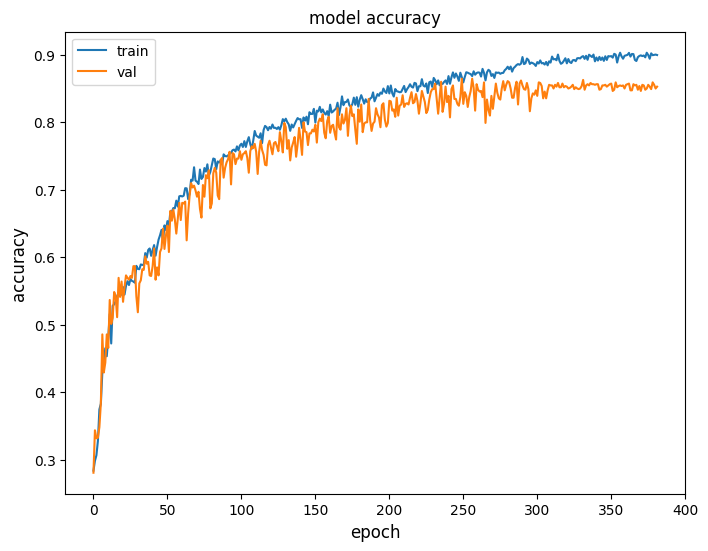

In [33]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

### Predict the results on test data sets

In [34]:
y_predicted = model.predict(x_test)
y_pred = np.argmax(y_predicted, axis=1)
print(y_pred)
labels = ["chirp", "magrot", "neutrino", "noexp"]

43/43 [==============================] - 0s 4ms/step
[3 2 1 ... 2 0 1]


### Build the confusion Matrix to show the results

The confusion matrix is a fundamental tool in evaluating the performance of a multi-class machine learning model. It provides a summary of the predictions made by the model and their correspondence to the actual classes in the dataset. In a multi-class scenario, the confusion matrix is a square matrix where each row represents the instances in a predicted class and each column represents the instances in an actual class. Here's an example of a confusion matrix for a multi-class model:

|    Predicted Class   |   Class A   |   Class B   |   Class C   |
|----------------------|-------------|-------------|-------------|
|      **Class A**     |     TP      |     FN      |     FN      |
|----------------------|-------------|-------------|-------------|
|      **Class B**     |     FP      |     TP      |     FN      |
|----------------------|-------------|-------------|-------------|
|      **Class C**     |     FN      |     FP      |     TP      |
|----------------------|-------------|-------------|-------------|
 

In the confusion matrix, the terms have the following meanings:
- **True Positives (TP)**: The number of instances correctly predicted as belonging to a particular class.
- **False Positives (FP)**: The number of instances incorrectly predicted as belonging to a particular class when they actually belong to a different class.
- **False Negatives (FN)**: The number of instances incorrectly predicted as not belonging to a particular class when they actually belong to that class.
To interpret the confusion matrix, you can analyze the distribution of predictions across the classes. Key metrics derived from the confusion matrix include:

* Accuracy: It measures the overall correctness of the model's predictions and is calculated as (TP + TN) / (TP + TN + FP + FN).
* Precision: It quantifies the model's ability to correctly identify positive instances for a given class and is calculated as TP / (TP + FP).
* Recall (also known as Sensitivity or True Positive Rate): It represents the model's ability to correctly identify positive instances out of the total actual positive instances and is calculated as TP / (TP + FN).
* F1-score: It combines precision and recall into a single metric and is calculated as the harmonic mean of precision and recall, given by 2 * (Precision * Recall) / (Precision + Recall).
By analyzing the values in the confusion matrix and these metrics, you can gain insights into the strengths and weaknesses of your multi-class machine learning model and make informed decisions about improving its performance.

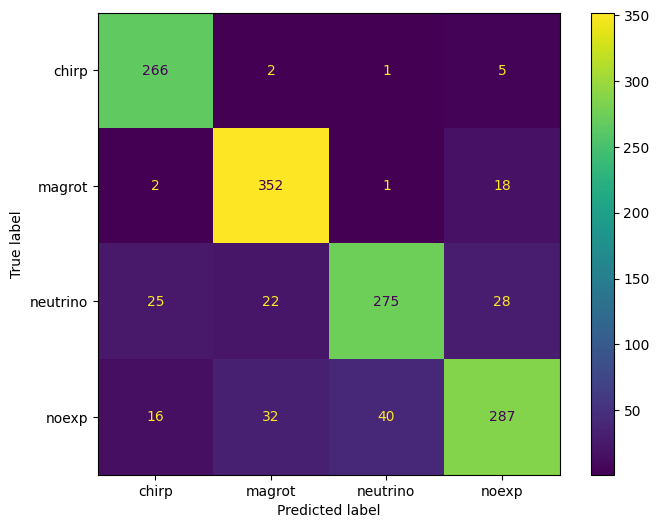

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

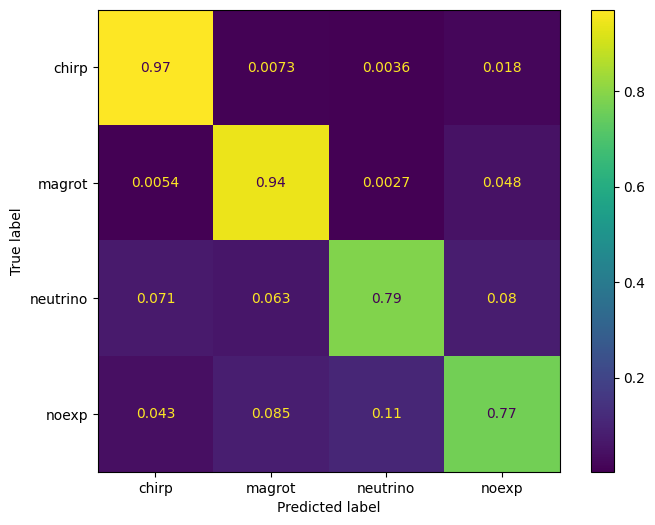

In [36]:

cm=confusion_matrix(y_test, y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()